In [ ]:
'''
Name    : Priyak Thakkar
Program : Maze Solver using MDP
Date    : 17th Octomber 2021
Time    : 2:30 AM (California, San Jose)

Notes : 
    1) Image folder contains all the outputs of the given code
    2) Matplotlib Presentation in Jupyter Notebook is not very clear of 15x15 matrix. So, pls go and see the output
    3) Index[2] is the best representation
    4) Color distribution got worsen with more no of matrix (IDK how to handle it, May be I have to use softmax or onehot coding to lower the value)
    5) I tried this program with Transitional Probability, It's working But not at the par. But, just for the guidance, I am attaching that too.
'''

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
class MazeEnvironment:
    def __init__(self, n, actions, rewards, e_x, e_y):
        self.n = n
        self.actions = actions
        self.rewards = rewards
        self.e_x = e_x
        self.e_y = e_y

In [3]:
def get_init_v(n, v0, e_x, e_y):
    """Defines initial value function v_0
    Args:
        n (int): length and width of the grid
        v0 (float): initial value for the value function (equal for every state)
        e_x (int): x value of the end cell
        e_y (int): y value of the end cell
    Returns:
        v0 (array): initial value function
    """

    v0 = v0 * np.ones((n, n))

    # Value function of terminal state must be 0
    v0[e_x, e_y] = 5

    return v0

def get_equiprobable_policy(n):
    """Defines the equiprobable policy. Policy is a matrix s.t.
        pi[x, y, a] = Pr[A = a | S = (x,y)]
    Actions are:
        * 0: go left
        * 1: go up
        * 2: go right
        * 3: go down
    Args:
        n (int): length and width of the grid
    Returns:
        pi (array): numpy array representing the equiprobably policy
    """

    pi = 1/4 * np.ones((n, n, 4))
    return pi

def build_grid(r_walls):
    
    n = 15 
    actions = [0, 1, 2, 3]
    pos_x  = 1
    pos_y = 1

    # maze = np.array([
    #                 ['W', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
    #                 ['W', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
    #                 ['W', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
    #                 ['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', ' ', ' ', ' '],
    #                 ['W', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
    #                 ['W', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
    #                 ['W', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
    #                 ['W', ' ', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', ' '],
    #                 ['W', ' ', 'W', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
    #                 ['W', ' ', 'W', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
    #                 ['W', ' ', 'W', ' ', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W'],
    #                 ['W', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
    #                 ['W', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'W', 'W', 'W', ' ', ' ', ' '],
    #                 ['W', ' ', 'W', 'W', 'W', ' ', ' ', ' ', ' ', 'W', ' ', 'W', ' ', ' ', ' '],
    #                 ['W', ' ', ' ', ' ', 'W', 'W', 'W', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
    #                 ])
    
    maze = np.array([
                    ['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W'],  
                    ['W', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'W'],
                    ['W', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'W'],
                    ['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', ' ', ' ', 'W'],
                    ['W', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'W'],
                    ['W', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'W'],
                    ['W', ' ', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', ' ', 'W'],
                    ['W', ' ', 'W', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'W'],
                    ['W', ' ', 'W', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'W'],
                    ['W', ' ', 'W', ' ', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W'],
                    ['W', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'W'],
                    ['W', ' ', 'W', 'W', 'W', ' ', ' ', ' ', ' ', 'W', 'W', 'W', ' ', ' ', 'W'],
                    ['W', ' ', 'W', ' ', 'W', 'W', 'W', ' ', ' ', 'W', ' ', 'W', ' ', ' ', 'W'],
                    ['W', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'W'],
                    ['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W'],
                    ])

    rewards = (-1) * np.ones((n, n))

    for i in range(len(maze)):
        for j in range(len(maze)):
            if maze[i][j] == 'W':
                rewards[i][j] = r_walls
    
    rewards[pos_x, pos_y] = 0
    maze_env = MazeEnvironment(n, actions, rewards, pos_x, pos_y)
    
    print(rewards)
    return maze_env

def Auto_build_grid(n, p_barrier, r_barrier, seed_nr):
    """Build an NxN grid with start and end cells, as well as some barrier cells.
    Args:
        n (int): length and width of the grid
        p_barrier (float): probability of a cell being a barrier
        r_barrier (int): reward for the barrier cells
        seed_nr (int): seed number (for reproducible results) 
    Returns:
        env (MazeEnvironment): grid world environment
    """

    # Define set of possible actions: go left (0), up (1), right (2) or down (4)
    actions = [0, 1, 2, 3]

    # Define start and end cells -> these will have value 0
    random.seed(seed_nr)
    e_x = random.randrange(n)
    e_y = random.randrange(n)

    # Define barrier cells -> these will have barrier reward. All other have -1 reward
    rewards = (-1) * np.ones((n, n))
    for i in range(n):
        for j in range(n):
            if i != e_x or j != e_y:
                p = random.uniform(0, 1)
                if p < p_barrier:
                    rewards[i, j] = r_barrier
    print(rewards)
    # Create environment
    env = MazeEnvironment(n, actions, rewards, e_x, e_y)

    return env

In [4]:
def policy_iteration(n, p_barrier, r_barrier, v0_val, gamma, theta, seed_nr, flag):
    """Runs a simulation of the Policy Iteration (prediction + control) algorithm
    Args:
        n (int): length and width of the grid
        p_barrier (float): probability of a cell being a barrier
        r_barrier (int): reward for the barrier cells
        v0_val (int): initial value for the value function
        gamma (float): gamma parameter (between 0 and 1)
        theta (float): threshold parameter that defines when the change in the value function is negligible
        seed_nr (int): seed number (for reproducible results)
        flag (int) : 0 for Professor's Grid , 1 or any value for Auto grid generations
    """

    # Create initial environment
    if flag == 0:
        env = build_grid(r_barrier)
    else:
        env = Auto_build_grid(n, p_barrier, r_barrier, seed_nr)
    
    i = 0
    plot_grid(env)

    # Generate initial value function and policy
    v = get_init_v(n, v0_val, env.e_x, env.e_y)
    pi = get_equiprobable_policy(n)

    # Plot initial value function and policy
    plot_v_values(v, env.n)
    plot_optimal_actions(env, pi)

    policy_stable = False
    while not policy_stable:
        i += 1
        print("\nIteration {} of Policy Iteration algorithm".format(i))
        # Run the policy evaluation
        policy_evaluation(env, v, pi, gamma, theta)
        # Run the policy improvement algorithm
        policy_stable = policy_improvement(env, v, pi, gamma)
        plot_optimal_actions(env, pi)

    print("\nPolicy Iteration algorithm converged after {} steps".format(i))

def policy_evaluation(env, v, pi, gamma, theta):
    """Applies the policy evaluation algorithm.
    Args:
        env (MazeEnvironment): gridworld environment
        v (array): numpy array representing the value function
        pi (array): numpy array representing the policy
        gamma (float): gamma parameter (between 0 and 1)
        theta (float): threshold parameter that defines when the change in the value function is negligible
    """

    delta = theta + 1
    iter = 0

    while delta >= theta:
        old_v = v.copy()
        delta = 0

        # Traverse all states
        for x in range(env.n):
            for y in range(env.n):
                # Run one iteration of the Bellman update rule for the value function
                bellman_update(env, v, old_v, x, y, pi, gamma)
                # Compute difference
                delta = max(delta, abs(old_v[x, y] - v[x, y]))

        iter += 1

    # Plot new value function
    plot_v_values(v, env.n)
    print("\nThe Policy Evaluation algorithm converged after {} iterations".format(iter))

def bellman_update(env, v, old_v, x, y, pi, gamma):
    """Applies the Bellman update rule to the value function
    Args:
        env (MazeEnvironment): grid world environment
        v (array): numpy array representing the value function
        old_v (array): numpy array representing the value function on the last iteration
        x (int): x value position of the current state
        y (int): y value position of the current state
        pi (array): numpy array representing the policy
        gamma (float): gamma parameter (between 0 and 1)
    """

    # The value function on the terminal state always has value 0
    if x == env.e_x and y == env.e_y:
        return None

    total = 0

    for a in env.actions:
        # Get next state
        s_prime_x, s_prime_y = get_next_state(x, y, a, env.n)

        total += pi[x, y, a] * (env.rewards[s_prime_x, s_prime_y] + gamma * old_v[s_prime_x, s_prime_y])

    # Update the value function
    v[x, y] = total

def get_next_state(x, y, a, n):
    """Computes next state from current state and action.
    Args:
        x (int): x value of the current state
        y (int): y value of the current state
        a (int): action
        n (int): length and width of the grid
    Returns:
        s_prime_x (int): x value of the next state
        s_prime_y (int): y value of the next state
    """

    # Compute next state according to the action
    if a == 0:
        s_prime_x = x
        s_prime_y = max(0, y - 1)
    elif a == 1:
        s_prime_x = max(0, x - 1)
        s_prime_y = y
    elif a == 2:
        s_prime_x = x
        s_prime_y = min(n - 1, y + 1)
    else:
        s_prime_x = min(n - 1, x + 1)
        s_prime_y = y

    return s_prime_x, s_prime_y

def policy_improvement(env, v, pi, gamma):
    """Applies the Policy Improvement step.
    Args:
        env (MazeEnvironment): gridworld environment
        v (array): numpy array representing the value function
        pi (array): numpy array representing the policy
        gamma (float): gamma parameter (between 0 and 1)
    """

    policy_stable = True

    # Iterate states
    for x in range(env.n):
        for y in range(env.n):
            old_pi = pi[x, y, :].copy()

            # Iterate all actions
            best_actions = []
            max_v = None
            for a in env.actions:
                # Compute next state
                s_prime_x, s_prime_y = get_next_state(x, y, a, env.n)
                # Get value
                curr_val = env.rewards[s_prime_x, s_prime_y] + gamma * v[s_prime_x, s_prime_y]

                if max_v is None:
                    max_v = curr_val
                    best_actions.append(a)
                elif curr_val > max_v:
                    max_v = curr_val
                    best_actions = [a]
                elif curr_val == max_v:
                    best_actions.append(a)

            # Define new policy
            define_new_policy(pi, x, y, best_actions, env.actions)

            # Check whether the policy has changed
            if not (old_pi == pi[x, y, :]).all():
                policy_stable = False

    return policy_stable

def define_new_policy(pi, x, y, best_actions, actions):
    """Defines a new policy given the new best actions.
    Args:
        pi (array): numpy array representing the policy
        x (int): x value position of the current state
        y (int): y value position of the current state
        best_actions (list): list with best actions
        actions (list): list of every possible action
    """

    prob = 1/len(best_actions)

    for a in actions:
        pi[x, y, a] = prob if a in best_actions else 0


In [5]:
def value_iteration(n, p_barrier, r_barrier, seed_nr, v0_val, gamma, theta, flag):
    """Runs a simulation of the Policy Iteration (prediction + control) algorithm
    Args:
        n (int): length and width of the grid
        p_barrier (float): probability of a cell being a barrier
        r_barrier (int): reward for the barrier cells
        v0_val (int): initial value for the value function
        gamma (float): gamma parameter (between 0 and 1)
        theta (float): threshold parameter that defines when the change in the value function is negligible
        seed_nr (int): seed number (for reproducible results)
        flag (int) : 0 for Professor's Grid , 1 or any value for Auto grid generations
    """

    if flag == 0:
        env = build_grid(r_barrier)
    else:
        env = Auto_build_grid(n, p_barrier, r_barrier, seed_nr)
   
    plot_grid(env)

    i= 0

    # Generate initial value function and policy
    v = get_init_v(n, v0_val, env.e_x, env.e_y)
    pi = get_equiprobable_policy(n)

    # Plot initial value function and policy
    plot_v_values(v, env.n)
    plot_optimal_actions(env, pi)

    is_value_changed = True

    policy_stable = False
    while not policy_stable:
        i += 1
        print("\nIteration {} of Value Iteration algorithm".format(i))
        # Run the policy evaluation
        delta = theta + 1
        iter = 0

        while delta >= theta:
            old_v = v.copy()
            delta = 0

            # Traverse all states
            for x in range(env.n):
                for y in range(env.n):
                    # Run one iteration of the Bellman update rule for the value function
                    total = []
                    # if x == env.e_x and y == env.e_y:
                    #     return None
                    for a in env.actions:
                        # Get next state
                        s_prime_x, s_prime_y = get_next_state(x, y, a, env.n) 
                        total.append(env.rewards[s_prime_x, s_prime_y] + gamma * old_v[s_prime_x, s_prime_y])
                    max_v = max(total)

                    # Update the value function
                    if max_v != v[x,y]:
                        is_value_changed = True
                        v[x,y] = max_v
                    # Compute difference
                    delta = max(delta, abs(old_v[x, y] - v[x, y]))

            iter += 1

        # Plot new value function
        plot_v_values(v, env.n)
        print("\nThe Evaluation algorithm converged after {} iterations".format(iter))

        # Run the policy improvement algorithm
        policy_stable = policy_improvement(env, v, pi, gamma)
        plot_optimal_actions(env, pi)

    print("\nValue Iteration algorithm converged after {} steps".format(i))


    itr = 0
    for x in range(env.n):
        for y in range(env.n):
            old_pi = pi[x,y,:].copy()

            best_actions = []
            max_v = None
            for a in env.actions:
                # Compute next state
                new_state_x, new_state_y = get_next_state(x, y, a, env.n)
                # Get value
                curr_val = env.rewards[new_state_x, new_state_y] + gamma * v[new_state_x, new_state_y]

                if max_v is None:
                    max_v = curr_val
                    best_actions.append(a)
                elif curr_val > max_v:
                    max_v = curr_val
                    best_actions = [a]
                elif curr_val == max_v:
                    best_actions.append(a)

            # Define new policy
            define_new_policy(pi, x, y, best_actions, env.actions)
           
            # Check whether the policy has changed
            if not (old_pi == pi[x, y, :]).all():
                policy_stable = False

    plot_optimal_actions(env, pi)
    print("\nValue Iteration algorithm converged after {} steps".format(itr))


In [6]:
def plot_grid(env):
    """Plot grid
    Args:
        env (MazeEnvironment): grid world environment
    """

    data = env.rewards.copy()
    data[env.e_x, env.e_y] = 10

    # create discrete colormap
    cmap = colors.ListedColormap(['grey', 'white', 'red'])
    bounds = [-11, -2, 0, 12]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots()
    ax.imshow(data, cmap=cmap, norm=norm)

    # draw gridlines
    ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
    ax.set_xticks(np.arange(-.5, env.n, 1))
    ax.set_yticks(np.arange(-.5, env.n, 1))

    plt.show()

def plot_v_values(v, n):
    """Plots the value function in each state as a grid.
    Args:
        v (array): numpy array representing the value function
        n (int):
    """

    fig, ax = plt.subplots()
    im = ax.imshow(v, cmap='YlOrBr', interpolation='nearest')
    fig.colorbar(im, ax=ax)
    
    # draw gridlines
    ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
    ax.set_xticks(np.arange(-.5, n, 1))
    ax.set_yticks(np.arange(-.5, n, 1))

    # Loop over data dimensions and create text annotations.
    for i in range(n):
        for j in range(n):
            text = ax.text(j, i, "{:.2f}".format(v[i, j]), ha="center", va="center", color="black")

    ax.set_title("Value function")
    fig.tight_layout()
    plt.show()

def plot_optimal_actions(env, pi):
    """Plots the optimal action to take in each state
    Args:
        env (MazeEnvironment): grid world environment
        pi (array): numpy array indicating the probability of taking each action in each state
    """

    data = env.rewards.copy()
    data[env.e_x, env.e_y] = 10

    # create discrete colormap
    cmap = colors.ListedColormap(['grey', 'white', 'red'])
    bounds = [-11, -2, 0, 12]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots()
    ax.imshow(data, cmap=cmap, norm=norm)

    # draw gridlines
    ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
    ax.set_xticks(np.arange(-.5, env.n, 1))
    ax.set_yticks(np.arange(-.5, env.n, 1))

    # Loop over data dimensions and create text annotations.
    for i in range(env.n):
        for j in range(env.n):
            arrow = get_arrow(pi[i, j, :])
            text = ax.text(j, i, arrow, fontsize=16, ha="center", va="center", color="black")

    ax.set_title("Policy")
    fig.tight_layout()
    plt.show()

def get_arrow(prob_arr):
    """Returns the arrows that represent the highest probability actions.
    Args:
        prob_arr (array): numpy array denoting the probability of taking each action on a given state
    Returns:
        arrow (str): string denoting the most probable action(s)
    """

    best_actions = np.where(prob_arr == np.amax(prob_arr))[0]
    if len(best_actions) == 1:
        if 0 in best_actions:
            return r"$\leftarrow$"
        if 1 in best_actions:
            return r"$\uparrow$"
        if 2 in best_actions:
            return r"$\rightarrow$"
        else:
            return r"$\downarrow$"

    elif len(best_actions) == 2:
        if 0 in best_actions and 1 in best_actions:
            return r"$\leftarrow \uparrow$"
        elif 0 in best_actions and 2 in best_actions:
            return r"$\leftrightarrow$"
        elif 0 in best_actions and 3 in best_actions:
            return r"$\leftarrow \downarrow$"
        elif 1 in best_actions and 2 in best_actions:
            return r"$\uparrow \rightarrow$"
        elif 1 in best_actions and 3 in best_actions:
            return r"$\updownarrow$"
        elif 2 in best_actions and 3 in best_actions:
            return r"$\downarrow \rightarrow$"

    elif len(best_actions) == 3:
        if 0 not in best_actions:
            return r"$\updownarrow \rightarrow$"
        elif 1 not in best_actions:
            return r"$\leftrightarrow \downarrow$"
        elif 2 not in best_actions:
            return r"$\leftarrow \updownarrow$"
        else:
            return r"$\leftrightarrow \uparrow$"

    else:
        return r"$\leftrightarrow \updownarrow$"

[1] PROFESSOR'S GRID FOR POLICY ITERATIONS
[[-1.e+04 -1.e+04 -1.e+04 -1.e+04 -1.e+04 -1.e+04 -1.e+04 -1.e+04 -1.e+04
  -1.e+04 -1.e+04 -1.e+04 -1.e+04 -1.e+04 -1.e+04]
 [-1.e+04  0.e+00 -1.e+00 -1.e+00 -1.e+00 -1.e+00 -1.e+00 -1.e+00 -1.e+00
  -1.e+00 -1.e+00 -1.e+00 -1.e+00 -1.e+00 -1.e+04]
 [-1.e+04 -1.e+00 -1.e+00 -1.e+00 -1.e+00 -1.e+00 -1.e+00 -1.e+00 -1.e+00
  -1.e+00 -1.e+00 -1.e+00 -1.e+00 -1.e+00 -1.e+04]
 [-1.e+04 -1.e+04 -1.e+04 -1.e+04 -1.e+04 -1.e+04 -1.e+04 -1.e+04 -1.e+04
  -1.e+04 -1.e+04 -1.e+04 -1.e+00 -1.e+00 -1.e+04]
 [-1.e+04 -1.e+00 -1.e+00 -1.e+00 -1.e+00 -1.e+00 -1.e+00 -1.e+00 -1.e+00
  -1.e+00 -1.e+00 -1.e+00 -1.e+00 -1.e+00 -1.e+04]
 [-1.e+04 -1.e+00 -1.e+00 -1.e+00 -1.e+00 -1.e+00 -1.e+00 -1.e+00 -1.e+00
  -1.e+00 -1.e+00 -1.e+00 -1.e+00 -1.e+00 -1.e+04]
 [-1.e+04 -1.e+00 -1.e+04 -1.e+04 -1.e+04 -1.e+04 -1.e+04 -1.e+04 -1.e+04
  -1.e+04 -1.e+04 -1.e+04 -1.e+04 -1.e+00 -1.e+04]
 [-1.e+04 -1.e+00 -1.e+04 -1.e+00 -1.e+00 -1.e+00 -1.e+00 -1.e+00 -1.e+00
  -1.e+0

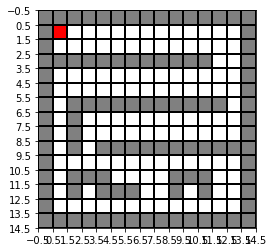

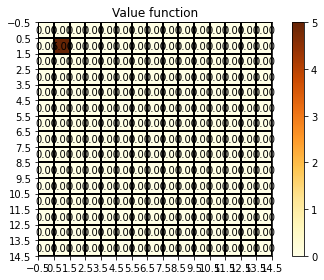

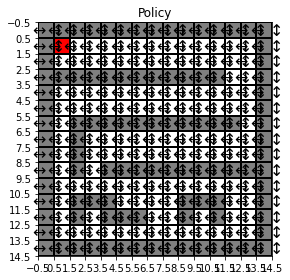


Iteration 1 of Policy Iteration algorithm


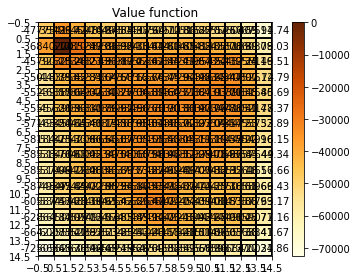


The Policy Evaluation algorithm converged after 147 iterations


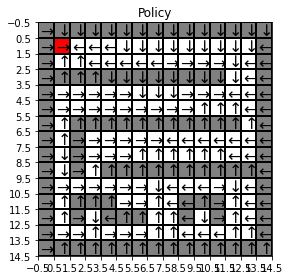


Iteration 2 of Policy Iteration algorithm


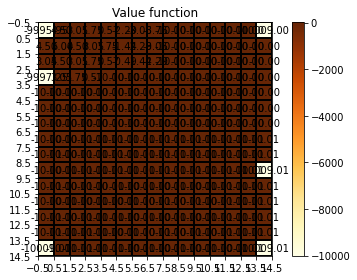


The Policy Evaluation algorithm converged after 149 iterations


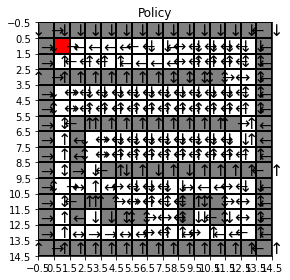


Iteration 3 of Policy Iteration algorithm


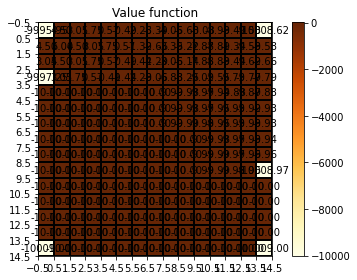


The Policy Evaluation algorithm converged after 39 iterations


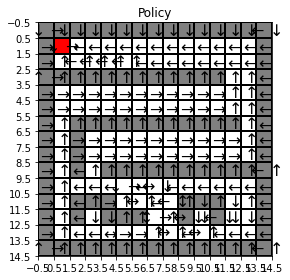


Iteration 4 of Policy Iteration algorithm


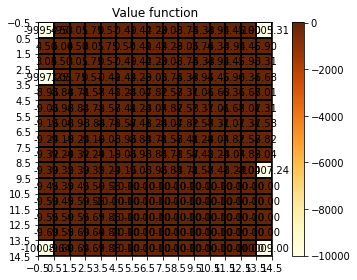


The Policy Evaluation algorithm converged after 31 iterations


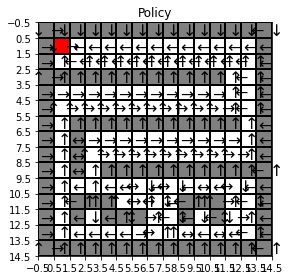


Iteration 5 of Policy Iteration algorithm


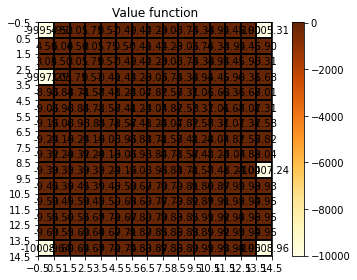


The Policy Evaluation algorithm converged after 33 iterations


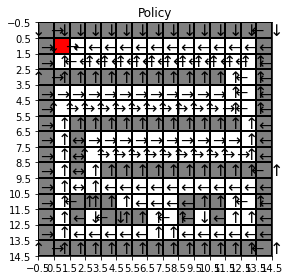


Iteration 6 of Policy Iteration algorithm


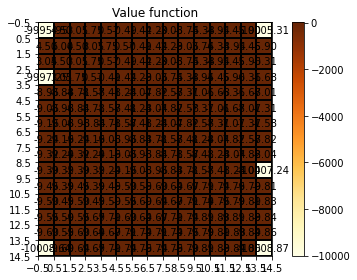


The Policy Evaluation algorithm converged after 14 iterations


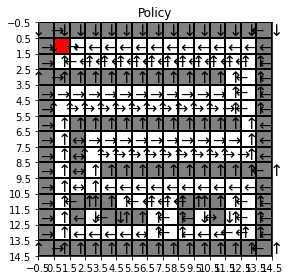


Iteration 7 of Policy Iteration algorithm


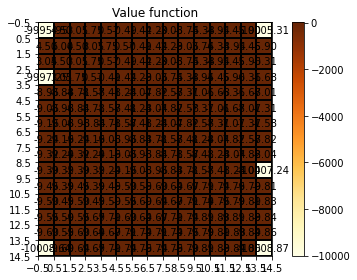


The Policy Evaluation algorithm converged after 1 iterations


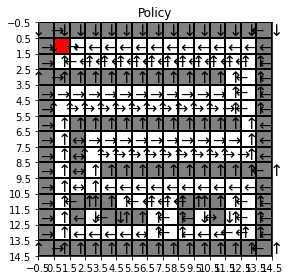


Policy Iteration algorithm converged after 7 steps
[2] AUTO GRID GENERATION FOR POLICY ITERATIONS
[[ -1. -50.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1. -50.]
 [ -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1. -50. -50. -50.]
 [ -1.  -1.  -1.  -1.  -1.]]


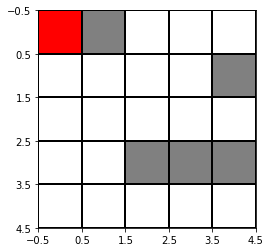

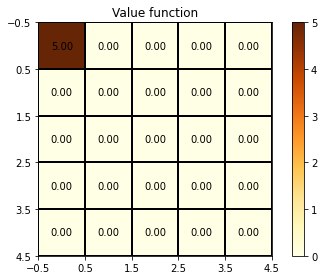

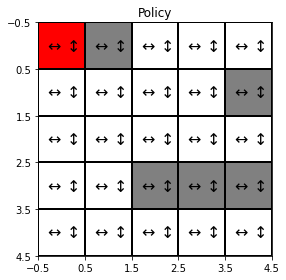


Iteration 1 of Policy Iteration algorithm


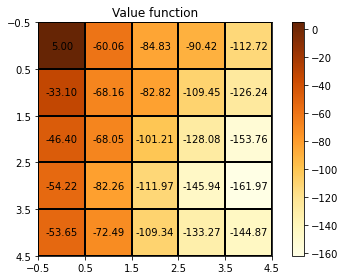


The Policy Evaluation algorithm converged after 83 iterations


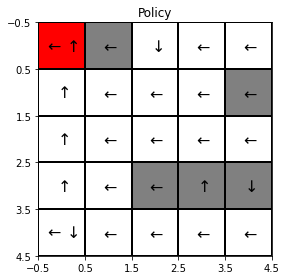


Iteration 2 of Policy Iteration algorithm


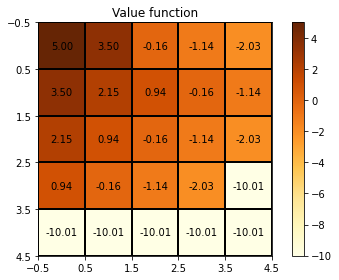


The Policy Evaluation algorithm converged after 81 iterations


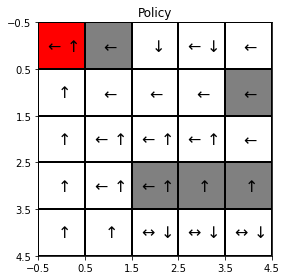


Iteration 3 of Policy Iteration algorithm


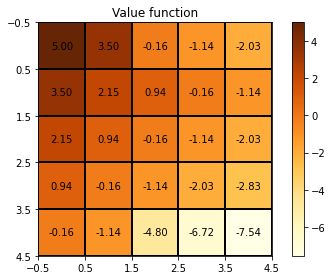


The Policy Evaluation algorithm converged after 40 iterations


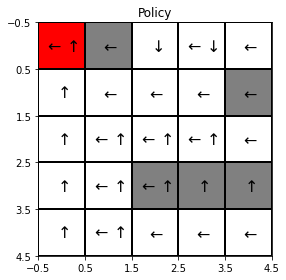


Iteration 4 of Policy Iteration algorithm


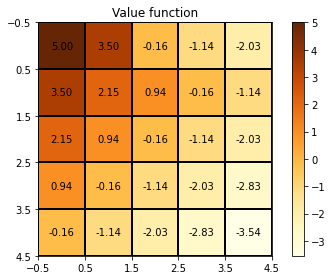


The Policy Evaluation algorithm converged after 4 iterations


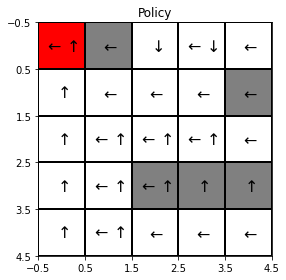


Policy Iteration algorithm converged after 4 steps


In [7]:
"""BEST REPRESENTATION OF MY WORK IS OPTION [2], BECAUSE ITS SMALL AND MANAGES THE COLOR RANGE"""

"""[It is for Auto Grid Generation] : 
    Flag value : 1

    Function will take the parameters, 
    But won't use it to generate Professor's Grid.
    This parameres will matters only When [Flag = 1]

    I am doing such things just to make things easy, to run and test.

    Thank You for reading. 
"""
""" policy_iteration(n, p_barrier, r_barrier, v0_val, gamma, theta, seed_nr, flag)
    value_iteration(n, p_barrier, r_barrier, v0_val, gamma, theta, seed_nr, flag)
    Args:
        n (int): length and width of the grid                                               
        p_barrier (float): probability of a cell being a barrier                            [It is for Auto Grid Generation]
        r_barrier (int): reward for the barrier cells
        v0_val (int): initial value for the value function
        gamma (float): gamma parameter (between 0 and 1)
        theta (float): threshold parameter that defines when the change in the value function is negligible
        seed_nr (int): seed number (for reproducible results)                               [It is for Auto Grid Generation]
        flag (int) : 0 for Professor's Grid , 1 or any value for Auto grid generations      [It is for Auto Grid Generation]
        
"""

# PLEASE GO STEP BY STEP HERE TO SEE DIFFERENT WORKING, AND COMMEND THEM AFTER USING, BEFORE APPLYING ANOTHER MODULE.
# ALL THE MODULE ARE DIFFERENT 

# policy_iteration(n, p_barrier, r_barrier, v0_val, gamma, theta, seed_nr, flag)
# [1] PROFESSOR'S GRID FOR POLICY ITERATIONS
print("[1] PROFESSOR'S GRID FOR POLICY ITERATIONS")
policy_iteration(15, 0.5, -10000, 0, 0.9, 0.001, 20, 0)

# [2] AUTO GRID GENERATION FOR POLICY ITERATIONS
print("[2] AUTO GRID GENERATION FOR POLICY ITERATIONS")
policy_iteration(5, 0.3, -50, 0, 0.9, 0.001, 2, 1)

# [3] PROFESSOR's GRID FOR VALUE ITERATIONS
# value_iteration(n, p_barrier, r_barrier, v0_val, gamma, theta, seed_nr, flag)
# value_iteration(15, 0.3, -100, 6, 0, 0.9, 0.01, 0)

# [4] AUTO GRID GENERATION FOR POLICY ITERATIONS
# Give the correct path, but grid is random so output is not so lucrative.
# value_iteration(10, 0.3, -10000, 6, 0, 0.9, 0.01, 1)
